In [2]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Step 2: Load and Prepare the Iris Dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
'target']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)
# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes
# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

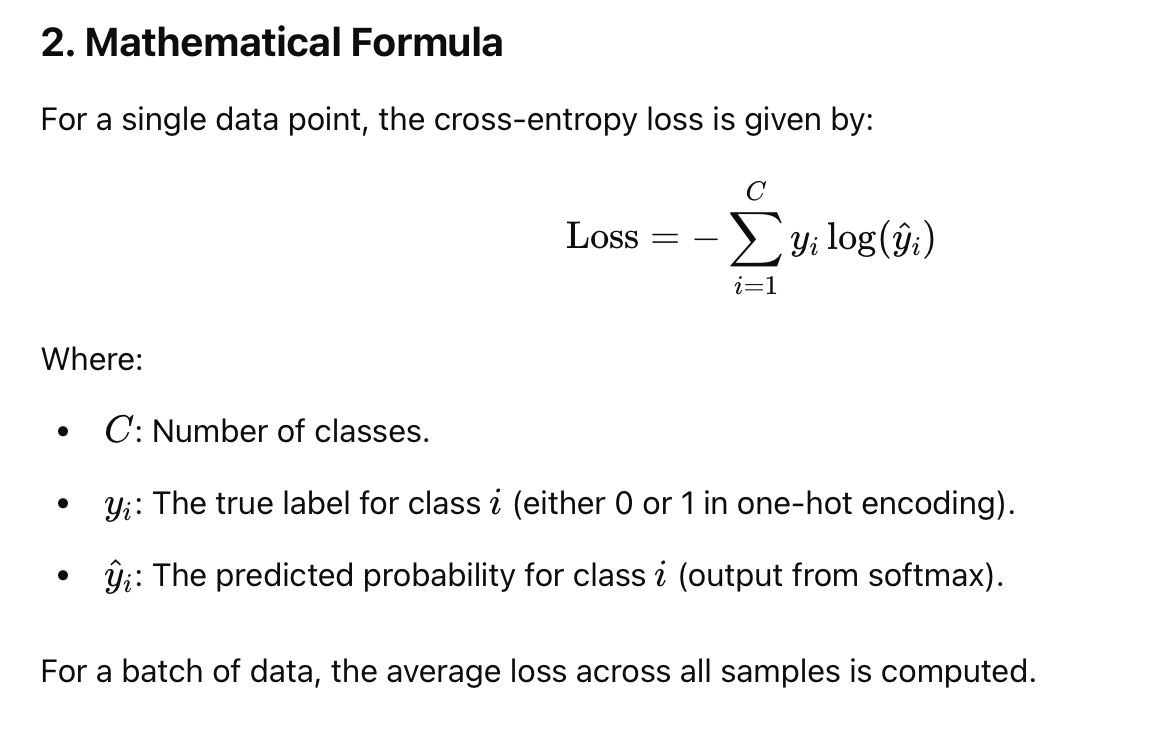

1. What is an Optimizer?
An optimizer is an algorithm that adjusts the weights and biases (parameters) of a neural network to minimize the loss function. It uses gradients computed during backpropagation to update the parameters iteratively. The goal is to find the set of parameters that minimizes the loss function and leads to the best predictions.


2. What is Adam?
Adam stands for Adaptive Moment Estimation, a widely used optimization algorithm in deep learning. It combines the advantages of two other popular optimization algorithms:

Momentum: Helps accelerate convergence by averaging gradients and dampening oscillations.
RMSprop (Root Mean Square Propagation): Adapts the learning rate for each parameter based on the magnitude of recent gradients, which helps handle varying gradient scales

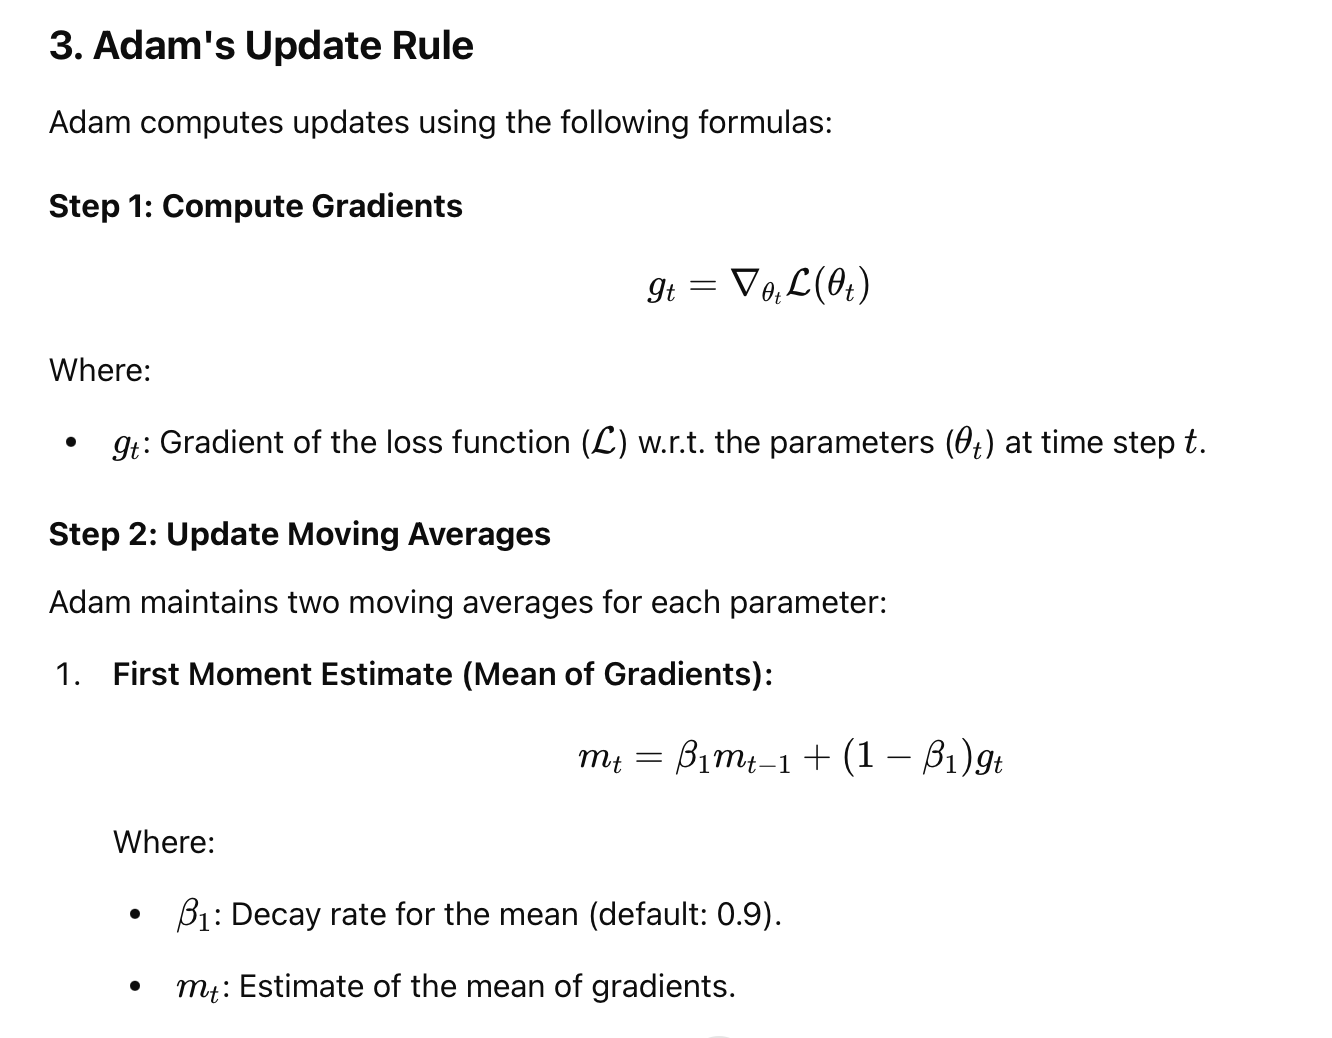

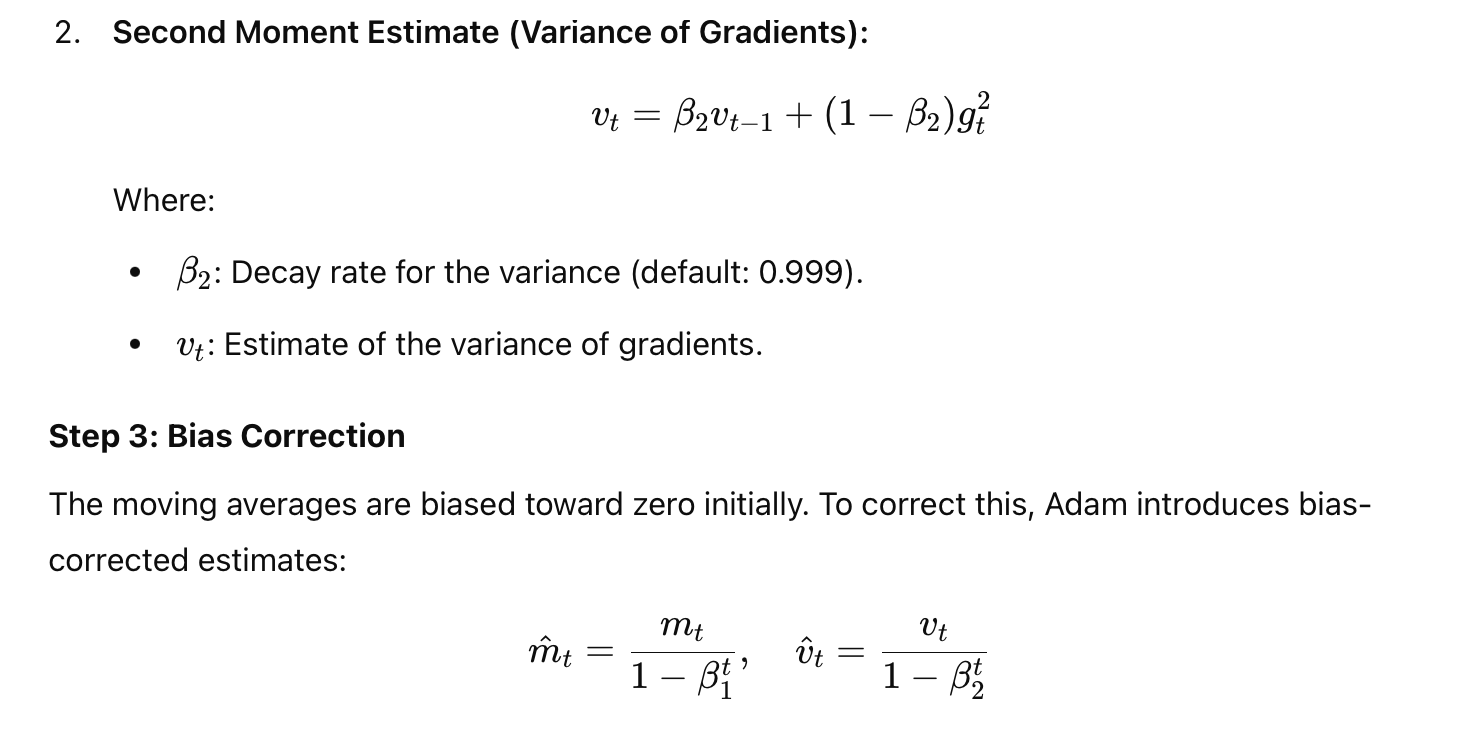

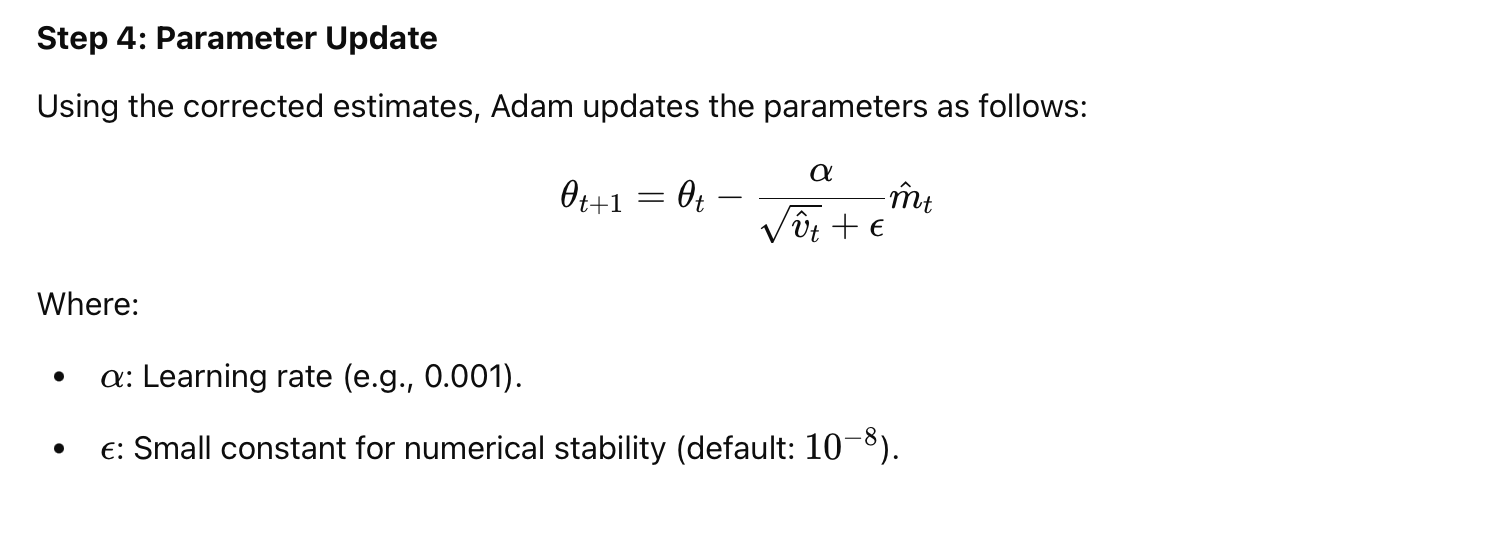

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Assuming train_loader is defined
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")


Epoch 1/20, Loss: 1.0966
Epoch 2/20, Loss: 1.0699
Epoch 3/20, Loss: 1.0426
Epoch 4/20, Loss: 1.0114
Epoch 5/20, Loss: 0.9648
Epoch 6/20, Loss: 0.9088
Epoch 7/20, Loss: 0.8338
Epoch 8/20, Loss: 0.7364
Epoch 9/20, Loss: 0.6470
Epoch 10/20, Loss: 0.5385
Epoch 11/20, Loss: 0.4545
Epoch 12/20, Loss: 0.3867
Epoch 13/20, Loss: 0.3313
Epoch 14/20, Loss: 0.2954
Epoch 15/20, Loss: 0.2537
Epoch 16/20, Loss: 0.2306
Epoch 17/20, Loss: 0.2034
Epoch 18/20, Loss: 0.1718
Epoch 19/20, Loss: 0.1577
Epoch 20/20, Loss: 0.1333


In [5]:
# Step 5: Validate the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for validation
    for X_batch, y_batch in test_loader:
        # Forward pass
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        total += y_batch.size(0)  # Total number of samples
        correct += (predicted == y_batch).sum().item()  # Count correctly predicted samples

# Calculate accuracy
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000


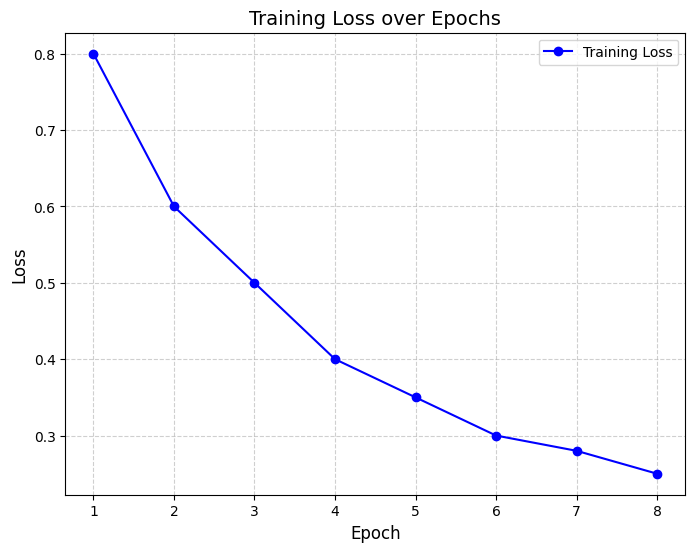

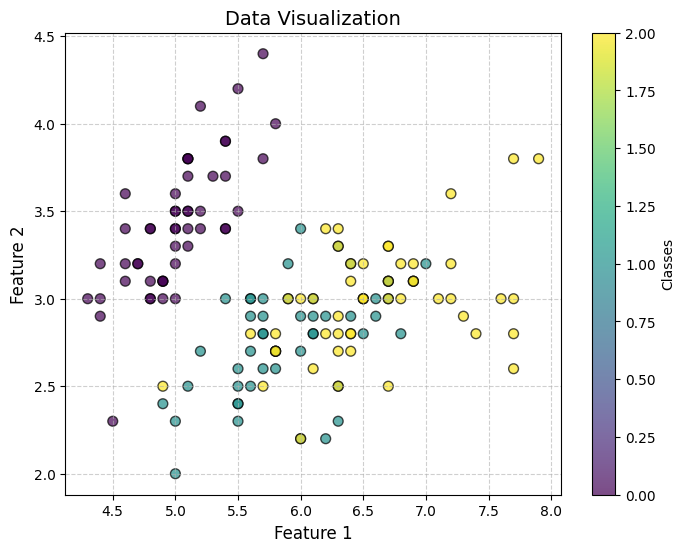

In [6]:
import matplotlib.pyplot as plt

# Step 6: Visualize Training Loss and Data Distribution

# Plotting training loss (example values, replace with actual loss values if available)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.show()

# Visualize data distribution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Feature 1', fontsize=12)  # Adjust labels based on your dataset
plt.ylabel('Feature 2', fontsize=12)
plt.title('Data Visualization', fontsize=14)
plt.colorbar(label='Classes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Epoch 1/20, Loss: 1.1342
Epoch 2/20, Loss: 1.1045
Epoch 3/20, Loss: 1.0702
Epoch 4/20, Loss: 1.0201
Epoch 5/20, Loss: 0.9436
Epoch 6/20, Loss: 0.8325
Epoch 7/20, Loss: 0.6989
Epoch 8/20, Loss: 0.5432
Epoch 9/20, Loss: 0.3857
Epoch 10/20, Loss: 0.2482
Epoch 11/20, Loss: 0.1501
Epoch 12/20, Loss: 0.0963
Epoch 13/20, Loss: 0.0668
Epoch 14/20, Loss: 0.0505
Epoch 15/20, Loss: 0.0388
Epoch 16/20, Loss: 0.0310
Epoch 17/20, Loss: 0.0255
Epoch 18/20, Loss: 0.0220
Epoch 19/20, Loss: 0.0185
Epoch 20/20, Loss: 0.0159
Test Accuracy: 1.0000


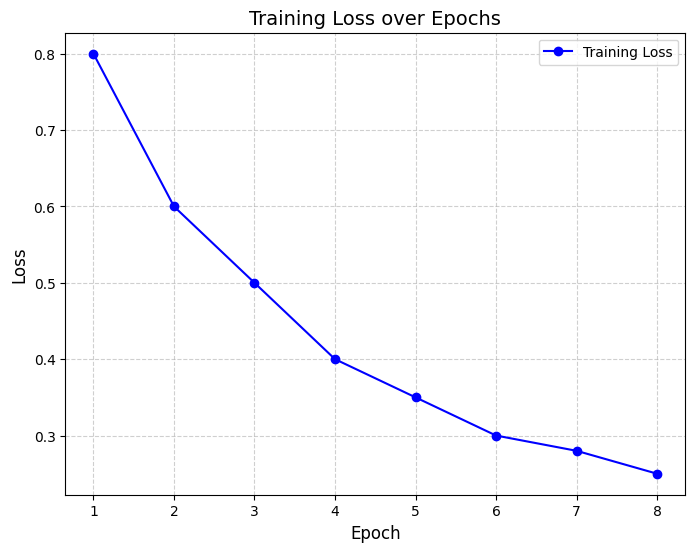

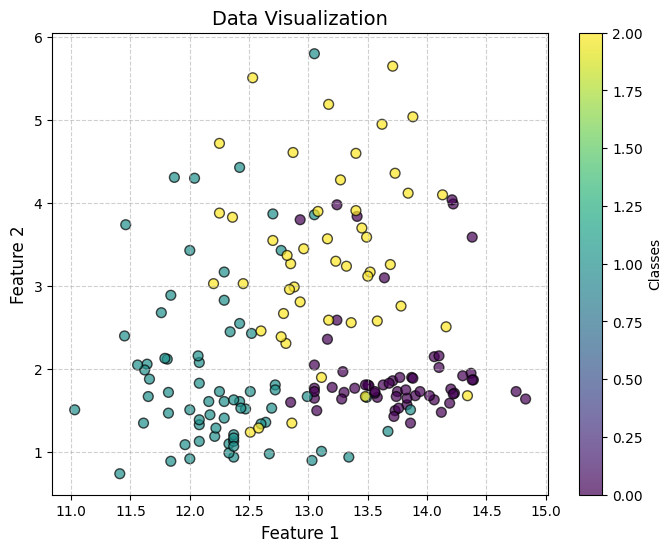

In [7]:
# WINE DATASET

# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Wine Dataset
columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
           'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
           'proanthocyanins', 'color_intensity', 'hue',
           'od280/od315_of_diluted_wines', 'proline']

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, names=columns)

# Split data into features and labels
X = df.iloc[:, 1:].values
y = df['target'].values - 1  # Targets in dataset start from 1, so subtract 1.

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


import torch
import torch.nn as nn
import torch.optim as optim

# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Assuming train_loader is defined
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")



# Step 5: Validate the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for validation
    for X_batch, y_batch in test_loader:
        # Forward pass
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        total += y_batch.size(0)  # Total number of samples
        correct += (predicted == y_batch).sum().item()  # Count correctly predicted samples

# Calculate accuracy
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


import matplotlib.pyplot as plt

# Step 6: Visualize Training Loss and Data Distribution

# Plotting training loss (example values, replace with actual loss values if available)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.show()

# Visualize data distribution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Feature 1', fontsize=12)  # Adjust labels based on your dataset
plt.ylabel('Feature 2', fontsize=12)
plt.title('Data Visualization', fontsize=14)
plt.colorbar(label='Classes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Epoch 1/20, Loss: 0.9876
Epoch 2/20, Loss: 0.8494
Epoch 3/20, Loss: 0.4748
Epoch 4/20, Loss: 0.1935
Epoch 5/20, Loss: 0.0984
Epoch 6/20, Loss: 0.0696
Epoch 7/20, Loss: 0.0616
Epoch 8/20, Loss: 0.0508
Epoch 9/20, Loss: 0.0454
Epoch 10/20, Loss: 0.0395
Epoch 11/20, Loss: 0.0362
Epoch 12/20, Loss: 0.0413
Epoch 13/20, Loss: 0.0341
Epoch 14/20, Loss: 0.0309
Epoch 15/20, Loss: 0.0228
Epoch 16/20, Loss: 0.0199
Epoch 17/20, Loss: 0.0194
Epoch 18/20, Loss: 0.0185
Epoch 19/20, Loss: 0.0153
Epoch 20/20, Loss: 0.0126
Test Accuracy: 0.9825


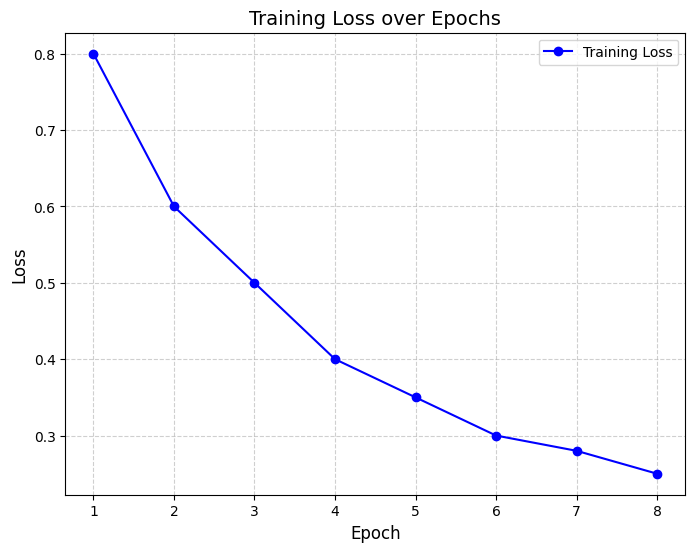

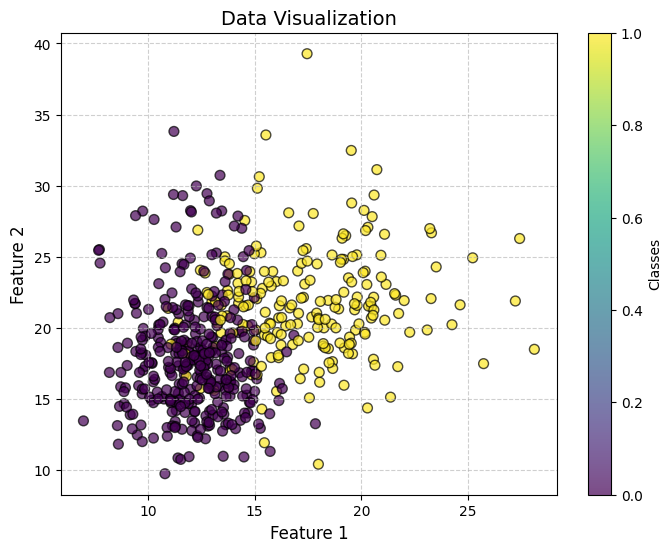

In [9]:
# WINE DATASET

# Step 1: Import Libraries
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Breast Cancer Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=columns)

# Drop ID column as it is not useful for training
df = df.drop('ID', axis=1)

# Map target classes (M: malignant -> 1, B: benign -> 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Split data into features and labels
X = df.iloc[:, 1:].values
y = df['Diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)



import torch
import torch.nn as nn
import torch.optim as optim

# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Assuming train_loader is defined
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")



# Step 5: Validate the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for validation
    for X_batch, y_batch in test_loader:
        # Forward pass
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        total += y_batch.size(0)  # Total number of samples
        correct += (predicted == y_batch).sum().item()  # Count correctly predicted samples

# Calculate accuracy
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


import matplotlib.pyplot as plt

# Step 6: Visualize Training Loss and Data Distribution

# Plotting training loss (example values, replace with actual loss values if available)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.show()

# Visualize data distribution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Feature 1', fontsize=12)  # Adjust labels based on your dataset
plt.ylabel('Feature 2', fontsize=12)
plt.title('Data Visualization', fontsize=14)
plt.colorbar(label='Classes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

